# Sentiment Analysis BTS Tickets Trading Account Tweets

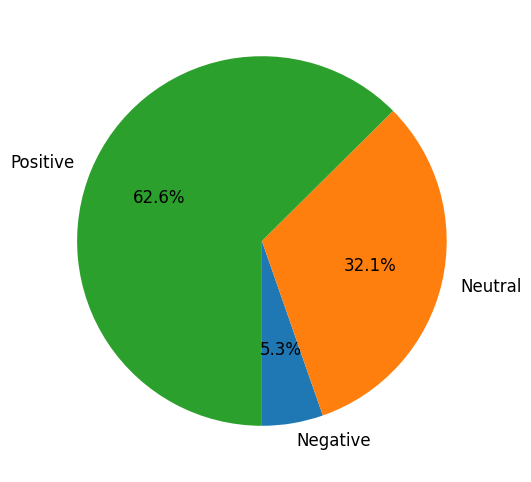

In [6]:
#IMPORT LIBRARIES

#from transformers import pipeline
import tweepy
import json
import requests
from requests_oauthlib import OAuth1
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

#References
#https://huggingface.co/blog/sentiment-analysis-python
#https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

#Trying out classifier
sentiment = SentimentIntensityAnalyzer()

consumer_key = my_key
consumer_secret = my_secret

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth)


#-----------------GET DATA--------------------

#GETTING TWITTER DATA AND RUNNING SENTIMENT CLASSIFIER

api_key = my_api_key
api_key_secret = my_key_secret

access_key = my_access_key
access_key_token = my_access_key_token

url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1(api_key, api_key_secret, access_key, access_key_token)
requests.get(url, auth=auth)

full_url='https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=875tickets&count=1000'

r = requests.get(full_url, auth=auth)

header='TWEETS'

tweet_list = []
cnt = 0
#tweets_json=[]
tweets_result = []
for tweet in r.json():
    #print('--------------------')
    #print (tweet['text'])
    tweet_list.append(tweet['text'])
    cnt = cnt + 1
    #print(cnt)
    #outputfile.write(tweet['text'])
    content = tweet['text']
    sent = sentiment.polarity_scores(content)
    tweets_result.append({'tweet': content, 'sentiment_data': sent, 'final_sentiment':sent['compound']})
    #tweets_json.append(tweet._json)

#print(json.dumps(tweets_result, indent=2))
#print(len(tweets_result))

#-----------TESTING SENTIMENT CLASSIFIER------------------

#sentiment = SentimentIntensityAnalyzer()
#text_1 = "The book was a perfect balance between wrtiting style and plot."
#text_2 =  "The pizza tastes terrible."
#sent_1 = sentiment.polarity_scores(text_1)
#sent_2 = sentiment.polarity_scores(text_2)
#print("Sentiment of text 1:", sent_1)
#print("Sentiment of text 2:", sent_2)


#---------ORGANIZE AND PLOT RESULTS----------------
# Loading the data in a dataframe
df = pd.DataFrame(tweets_result)

# Counting the number of tweets by sentiments
#print(df['final_sentiment'].head())
sentiment_counts = df.groupby(['final_sentiment']).size()
#print(sentiment_counts)
#print(type(sentiment_counts))

sentiment_out = [x for x in sentiment_counts]
#print(sentiment_out)

inx_list = []
for row in sentiment_counts.index:
    #print(row)
    inx_list.append(row)
#print(inx_list)

cnt_neg = 0
cnt_neu = 0
cnt_pos = 0

for i in range(len(inx_list)):
    if inx_list[i] < 0:
        cnt_neg = cnt_neg + sentiment_out[i]
    elif inx_list[i] == 0:
        cnt_neu = cnt_neu + sentiment_out[i]
    elif inx_list[i] > 0:
        cnt_pos = cnt_pos + sentiment_out[i]

sentiment_overall = {'Negative': cnt_neg, 'Neutral': cnt_neu, 'Positive': cnt_pos}
sentiment = pd.Series(sentiment_overall)
#print(sentiment.head())

# Visualizing the sentiments
fig = plt.figure(figsize=(6,6), dpi=100);
#fig.show()
ax = plt.subplot(111);
#sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
sentiment.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="");
